# Graduate Admissions Dataset Analysis

#### Dataset: Graduate Admissions Dataset (Admission_Predict.csv)
##### Source: Kaggle
##### Metrics: 500 rows, 9 columns
##### About: The graduate studies dataset is a dataset which describes the probability of selections for Indian students dependent on the following parameters below.
##### Parameters: The parameters include:
    1. GRE Score (out of 340)
    2. TOEFL Score (out of 120)
    3. IELTS Score (out of 9)
    4. University Rating (out of 5)
    5. Statement of Purpose/ SOP (out of 5)
    6. Letter of Recommendation/ LOR (out of 5)
    7. Research Experience (either 0 or 1)
    8. Chance of Admittance (ranging from 0 to 1)
##### This dataset was built with the purpose of helping students in shortlisting universities with their profiles. The predicted output gives them a fair idea about their chances for a particular university. This dataset is inspired by the UCLA Graduate Dataset from Kaggle.

## Importing Required Modules & Dataset 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
gad = pd.read_csv('gad.csv')
gad.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
gad.set_index('Serial No.', inplace = True)
gad.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
gad.rename(columns = {"Chance of Admit ": "Chance of Admit"}, inplace = True)

In [5]:
gad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 1 to 500
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 35.2 KB


In [6]:
gad.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [7]:
gad.describe().T

,count,mean,std,min,25%,50%,75%,max
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


In [8]:
attr = list(gad.columns)
print(attr)

['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit']


### Adding IELTS Score column to the dataset using a simple conversion of TOEFL Score to IELTS Score

In [9]:
gad.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [10]:
def convert_toefl_to_ielts(df):
    ielts_score = []
    for val in df['TOEFL Score']:
        if val >= 79 and val <= 93:
            ielts_score.append(6.5)
        if val >= 94 and val <= 101:
            ielts_score.append(7.0)
        if val >= 102 and val <= 109:
            ielts_score.append(7.5)
        if val >= 110 and val <= 114:
            ielts_score.append(8.0)
        if val >= 115 and val <= 117:
            ielts_score.append(8.5)
        if val >= 118 and val <= 120:
            ielts_score.append(9.0)
    df['IELTS Score'] = ielts_score
    return df

In [11]:
upgad = convert_toefl_to_ielts(gad)

In [12]:
new_cols= ['GRE Score', 'TOEFL Score', 'IELTS Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit']
upgad = upgad.reindex(columns = new_cols)

In [13]:
upgad.head()

,GRE Score,TOEFL Score,IELTS Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,,
1,337,118,9.0,4,4.5,4.5,9.65,1,0.92
2,324,107,7.5,4,4.0,4.5,8.87,1,0.76
3,316,104,7.5,3,3.0,3.5,8.00,1,0.72
4,322,110,8.0,3,3.5,2.5,8.67,1,0.80
5,314,103,7.5,2,2.0,3.0,8.21,0,0.65


In [14]:
upgad.to_csv('ie_gad.csv')

### Converting CGPA from out of 10 points to 4 points based on US-based University Standards

In [15]:
gad.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,IELTS Score
Serial No.,,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92,9.0
2,324,107,4,4.0,4.5,8.87,1,0.76,7.5
3,316,104,3,3.0,3.5,8.00,1,0.72,7.5
4,322,110,3,3.5,2.5,8.67,1,0.80,8.0
5,314,103,2,2.0,3.0,8.21,0,0.65,7.5


In [16]:
def gpa_to_4(x):
    return round(x / 2.5, 2)

In [17]:
gpgad = gad
gpgad.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,IELTS Score
Serial No.,,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92,9.0
2,324,107,4,4.0,4.5,8.87,1,0.76,7.5
3,316,104,3,3.0,3.5,8.00,1,0.72,7.5
4,322,110,3,3.5,2.5,8.67,1,0.80,8.0
5,314,103,2,2.0,3.0,8.21,0,0.65,7.5


In [18]:
gpgad['CGPA'] = gpgad['CGPA'].apply(gpa_to_4)
gpgad.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,IELTS Score
Serial No.,,,,,,,,,
1,337,118,4,4.5,4.5,3.86,1,0.92,9.0
2,324,107,4,4.0,4.5,3.55,1,0.76,7.5
3,316,104,3,3.0,3.5,3.20,1,0.72,7.5
4,322,110,3,3.5,2.5,3.47,1,0.80,8.0
5,314,103,2,2.0,3.0,3.28,0,0.65,7.5


In [19]:
gpgad.to_csv('gpa_gad.csv')

### Importing dataset with IELTS Score parameter

In [20]:
ad1 = pd.read_csv('ie_gad.csv')

In [21]:
ad1.head()

,Serial No.,GRE Score,TOEFL Score,IELTS Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,9.0,4,4.5,4.5,9.65,1,0.92
1,2,324,107,7.5,4,4.0,4.5,8.87,1,0.76
2,3,316,104,7.5,3,3.0,3.5,8.00,1,0.72
3,4,322,110,8.0,3,3.5,2.5,8.67,1,0.80
4,5,314,103,7.5,2,2.0,3.0,8.21,0,0.65


In [22]:
ad1.shape

(500, 10)

In [23]:
ad1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   IELTS Score        500 non-null    float64
 4   University Rating  500 non-null    int64  
 5   SOP                500 non-null    float64
 6   LOR                500 non-null    float64
 7   CGPA               500 non-null    float64
 8   Research           500 non-null    int64  
 9   Chance of Admit    500 non-null    float64
dtypes: float64(5), int64(5)
memory usage: 39.2 KB


In [24]:
ad1.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
IELTS Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

##### NO Null Values present in the Dataset

In [25]:
ad1.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial No.,500.0,250.50000,144.481833,1.00,125.7500,250.50,375.25,500.00
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
IELTS Score,500.0,7.68500,0.533708,6.50,7.5000,7.50,8.00,9.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


In [26]:
ad1.set_index('Serial No.', inplace = True)
ad1.head()

,GRE Score,TOEFL Score,IELTS Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,,
1,337,118,9.0,4,4.5,4.5,9.65,1,0.92
2,324,107,7.5,4,4.0,4.5,8.87,1,0.76
3,316,104,7.5,3,3.0,3.5,8.00,1,0.72
4,322,110,8.0,3,3.5,2.5,8.67,1,0.80
5,314,103,7.5,2,2.0,3.0,8.21,0,0.65


In [27]:
params = list(ad1.columns)
print(params)

['GRE Score', 'TOEFL Score', 'IELTS Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit']


## EDA

In [28]:
# Basic Modules
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
import plotly.graph_objs as go

In [29]:
# Modules to visualize the dataset
import matplotlib as mpl
import matplotlib.patches as mpatches
import seaborn as sns
import plotly.express as px
from plotly import tools
from plotly.subplots import make_subplots
from plotly.offline import iplot

### Univariate Analysis

In [30]:
def univariate(df, columns):
    for i in columns:
        fig = make_subplots(rows = 1, cols = 1)
        fig.add_trace(go.Bar(y = df[i].value_counts().values.tolist(), 
                             x = df[i].value_counts().index, 
                             text = df[i].value_counts().values.tolist(),
                             textfont = dict(size = 15),
                             textposition = 'outside', 
                             showlegend = False, 
                             marker = dict(color = '#19e6e6',
                                           line_color = 'black',
                                           line_width = 3)),
                      row = 1,col = 1)

        fig.update_layout(title = 'Density distribution of ' + i, template = 'plotly_white')
        fig.update_yaxes(range = [0, 500])
        iplot(fig)

In [31]:
univariate(ad1, params)

### Bivariate Analysis

In [32]:
def bivariate(df, columns):
    for i in columns[:-1]:
        fig = px.box(df, x = i, y = 'Chance of Admit')
        fig.update_layout(title = i + ' Vs Chance of Admit',
                          template = 'plotly_white')
        fig.update_traces(marker_size = 12, marker_color = '#19e6e6')
        fig.show()

        fig = px.scatter(df, x = i, y = 'Chance of Admit', 
                         trendline = "ols", 
                         trendline_color_override = '#000000', 
                         width = 1000, height = 400)
        fig.update_traces(marker_size = 12, marker_color = '#19e6e6')
        fig.update_layout(title = i + ' Vs Chance of Admit',
                          template = 'plotly_white')
        fig.show()

In [33]:
bivariate(ad1, params)

### Correlation between parameters

<AxesSubplot:>

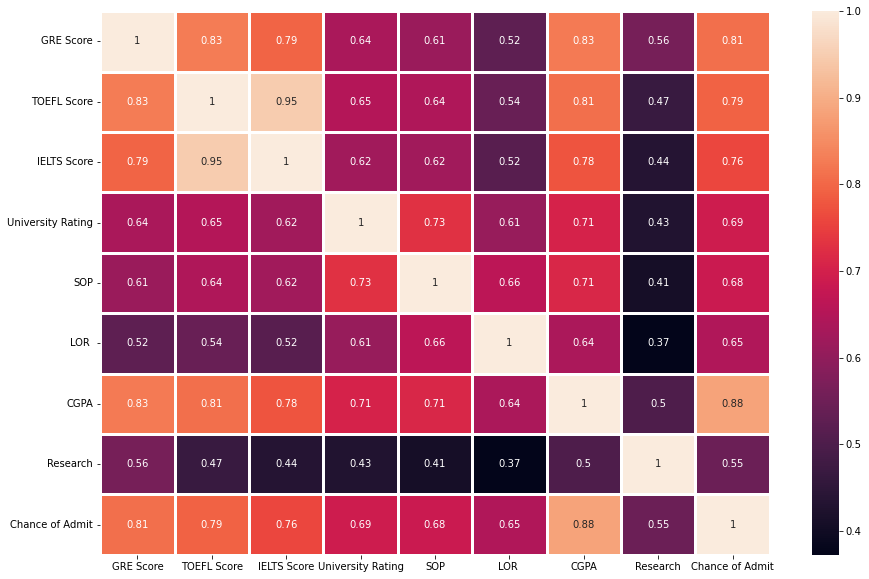

In [34]:
# Correlation matrix
cm = ad1.corr()
plt.figure(figsize = (15, 10))  
sns.heatmap(cm, annot = True, linewidth = 3)

## Model Selection and Building

In [35]:
# Modules for model creation
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [36]:
# Assigning the parameters as X and target variable as y
X = ad1.drop(["Chance of Admit"], axis =1)
y = ad1["Chance of Admit"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [37]:
# Building piplines for model selection
pipeline_lr = Pipeline([("scalar1",StandardScaler()),
                      ("LR",LinearRegression())])
pipeline_dt = Pipeline([("scalar2",StandardScaler()),
                      ("DT",DecisionTreeRegressor())])
pipeline_rf = Pipeline([("scalar3",StandardScaler()),
                      ("RF",RandomForestRegressor())])
pipeline_knn = Pipeline([("scalar4",StandardScaler()),
                       ("KN",KNeighborsRegressor())])
# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_knn]

# Dictionary of pipelines and model types for ease of reference
pipe_dict = {0: "LinearRegression", 1: "DecisionTree", 2: "RandomForest",3: "KNeighbors"}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

# Getting CV scores    
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train,scoring = "neg_root_mean_squared_error", cv = 10)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

LinearRegression: -0.060029 
DecisionTree: -0.087367 
RandomForest: -0.064293 
KNeighbors: -0.065521 


#### Looking at the Cross-Validation scores and choosing the ones with the least score. We will be going to evaluate using our top 3 models: Linear Regression, Random Forest and KNeighbors.

#### Linear Regression

In [38]:
# Model prediction on test data
pred = pipeline_lr.predict(X_test)

# Model Evaluation
r2 = metrics.r2_score(y_test, pred)
Adjusted_r2 = 1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
mae = metrics.mean_absolute_error(y_test, pred)
mse = metrics.mean_squared_error(y_test, pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, pred))

# initialise data of lists.
ResultData = [[r2],[Adjusted_r2],[mae],[mse],[rmse]]
# Creates pandas DataFrame.
Results = pd.DataFrame(ResultData,columns= ["Scores"] ,
                       index = ["R-Squared","Adjusted R-Squared", 
                                "Mean Absolute Error","Mean Square Error","Root Mean Square Error"])
Results.style.background_gradient()

,Scores
R-Squared,0.818663
Adjusted R-Squared,0.802721
Mean Absolute Error,0.042714
Mean Square Error,0.003708
Root Mean Square Error,0.060896


#### Random Forest Regression

In [39]:
# Model prediction on test data
pred = pipeline_rf.predict(X_test)

# Model Evaluation
r2 = metrics.r2_score(y_test, pred)
Adjusted_r2 = 1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
mae = metrics.mean_absolute_error(y_test, pred)
mse = metrics.mean_squared_error(y_test, pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, pred))

# initialise data of lists.
ResultData = [[r2],[Adjusted_r2],[mae],[mse],[rmse]]
# Creates pandas DataFrame.
Results = pd.DataFrame(ResultData,columns= ["Scores"] ,
                       index = ["R-Squared","Adjusted R-Squared", 
                                "Mean Absolute Error","Mean Square Error","Root Mean Square Error"])
Results.style.background_gradient()

,Scores
R-Squared,0.791170
Adjusted R-Squared,0.772811
Mean Absolute Error,0.043872
Mean Square Error,0.004271
Root Mean Square Error,0.065350


#### KNeighbors Classifier

In [40]:
# Model prediction on test data
pred = pipeline_knn.predict(X_test)

# Model Evaluation
r2 = metrics.r2_score(y_test, pred)
Adjusted_r2 = 1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
mae = metrics.mean_absolute_error(y_test, pred)
mse = metrics.mean_squared_error(y_test, pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, pred))

# initialise data of lists.
ResultData = [[r2],[Adjusted_r2],[mae],[mse],[rmse]]
# Creates pandas DataFrame.
Results = pd.DataFrame(ResultData,columns= ["Scores"] ,
                       index = ["R-Squared","Adjusted R-Squared", 
                                "Mean Absolute Error","Mean Square Error","Root Mean Square Error"])
Results.style.background_gradient()

,Scores
R-Squared,0.755059
Adjusted R-Squared,0.733526
Mean Absolute Error,0.050480
Mean Square Error,0.005009
Root Mean Square Error,0.070775


In [41]:
print(list(ad1.columns))

['GRE Score', 'TOEFL Score', 'IELTS Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit']


In [42]:
for i in range(1, 6):
    # Making predictions on some new data
    new_data = [(318, 108, 8.5, float(i), 5.0, 5.0, 8.0, 1)]

    # Convert to numpy array
    new_array = np.asarray(new_data)
    prediction = pipeline_lr.predict(new_array)

    # Output Labels
    print("GRE score = {}, TOEFL score = {}, IELTS score = {}, CGPA = {} ".format(new_data[0][0], new_data[0][1], new_data[0][2], new_data[0][6]))
    print("Chance of Admittance for university rating " + str(i) + " = {0:.3f} ".format(prediction[0]))
    if prediction[0] > 0.65:
        print('Admitted')
    else:
        print('Rejected')

GRE score = 318, TOEFL score = 108, IELTS score = 8.5, CGPA = 8.0 
Chance of Admittance for university rating 1 = 0.697 
Admitted
GRE score = 318, TOEFL score = 108, IELTS score = 8.5, CGPA = 8.0 
Chance of Admittance for university rating 2 = 0.700 
Admitted
GRE score = 318, TOEFL score = 108, IELTS score = 8.5, CGPA = 8.0 
Chance of Admittance for university rating 3 = 0.702 
Admitted
GRE score = 318, TOEFL score = 108, IELTS score = 8.5, CGPA = 8.0 
Chance of Admittance for university rating 4 = 0.705 
Admitted
GRE score = 318, TOEFL score = 108, IELTS score = 8.5, CGPA = 8.0 
Chance of Admittance for university rating 5 = 0.707 
Admitted


### Saving the Model

In [43]:
# Saving the model
import pickle 
pickle_out = open("model.pkl", mode = "wb") 
pickle.dump(pipeline_lr, pickle_out) 
pickle_out.close()